In [99]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [100]:
df = pd.read_csv('train.csv')
df.head(8)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True


In [101]:
df.shape

(8693, 14)

In [102]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [103]:
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [104]:
df['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

<h1 style='color:green;'> Data Handling </h1>

In [105]:
df.isnull().sum()[df.isnull().sum()>0]

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

In [106]:
df.shape

(8693, 14)

In [107]:
df['HomePlanet'] = df['HomePlanet'].map({'Earth':0, 'Europa':1, 'Mars':2})

In [108]:
df['HomePlanet'].value_counts()

0.0    4602
1.0    2131
2.0    1759
Name: HomePlanet, dtype: int64

In [109]:
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [110]:
df['Destination'] = df['Destination'].map({'TRAPPIST-1e':0, '55 Cancri e':1, 'PSO J318.5-22':2})

In [111]:
df['Destination'].value_counts()

0.0    5915
1.0    1800
2.0     796
Name: Destination, dtype: int64

In [112]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['CryoSleep'] = encoder.fit_transform(df['CryoSleep'])

In [113]:
df['CryoSleep'].value_counts()

0    5439
1    3037
2     217
Name: CryoSleep, dtype: int64

In [114]:
df['VIP'] = encoder.fit_transform(df['VIP'])

In [115]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [116]:
df['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [117]:
df['Cabin'] = encoder.fit_transform(df['Cabin'])

In [118]:
df['Cabin'].value_counts()

6560    199
6156      8
654       7
312       7
4695      7
       ... 
5892      1
1597      1
5876      1
5874      1
716       1
Name: Cabin, Length: 6561, dtype: int64

In [119]:
df.isnull().sum()[df.isnull().sum()>0]

HomePlanet      201
Destination     182
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

In [120]:
#filling missing values
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['RoomService'].fillna(df['RoomService'].mode()[0], inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].mode()[0], inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].mode()[0], inplace=True)
df['Spa'].fillna(df['Spa'].mode()[0], inplace=True)
df['VRDeck'].fillna(df['VRDeck'].mode()[0], inplace=True)

In [121]:
df.isnull().sum()[df.isnull().sum()>0]

Name    200
dtype: int64

In [122]:
df.drop(['Name'], axis=1, inplace=True)

In [123]:
df.set_index('PassengerId', inplace = True)

In [124]:
df.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,,
0001_01,1.0,0,149,0.0,39.0,0,0.0,0.0,0.0,0.0,0.0,False
0002_01,0.0,0,2184,0.0,24.0,0,109.0,9.0,25.0,549.0,44.0,True
0003_01,1.0,0,1,0.0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
0003_02,1.0,0,1,0.0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
0004_01,0.0,0,2186,0.0,16.0,0,303.0,70.0,151.0,565.0,2.0,True
0005_01,0.0,0,2183,2.0,44.0,0,0.0,483.0,0.0,291.0,0.0,True
0006_01,0.0,0,3425,0.0,26.0,0,42.0,1539.0,3.0,0.0,0.0,True
0006_02,0.0,1,4559,0.0,28.0,0,0.0,0.0,0.0,0.0,0.0,True
0007_01,0.0,0,3565,0.0,35.0,0,0.0,785.0,17.0,216.0,0.0,True


In [125]:
df['HomePlanet'] = df['HomePlanet'].astype(int)

<h1 style='color:tomato;'> Data Visualization</h1>

<AxesSubplot:>

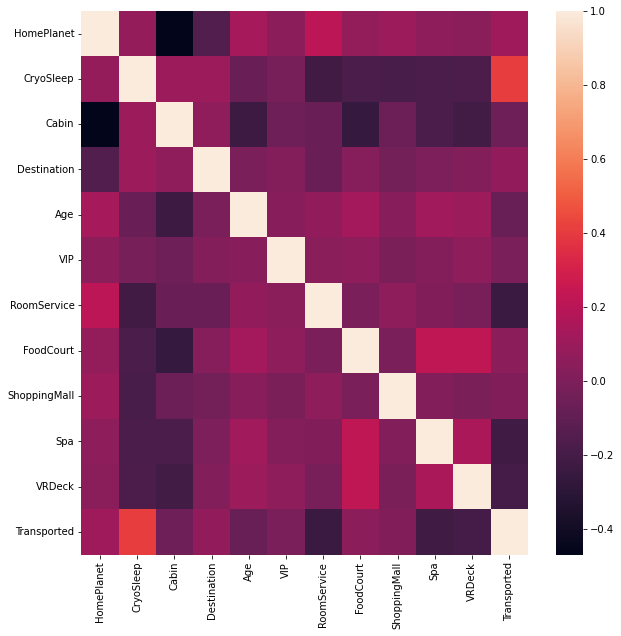

In [126]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Transported', ylabel='RoomService'>

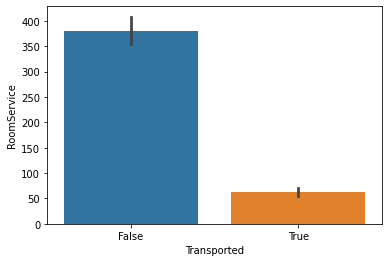

In [127]:
sns.barplot(x=df['Transported'], y=df['RoomService'])

In [128]:
train_features = df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
train_target = df['Transported']

In [129]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [130]:
test_df.set_index('PassengerId', inplace = True)

In [131]:
test_df.isnull().sum()[test_df.isnull().sum()>0]

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [132]:
test_df.shape

(4277, 12)

In [133]:
test_df['HomePlanet'].fillna(test_df['HomePlanet'].mode()[0], inplace=True)
test_df['Destination'].fillna(test_df['Destination'].mode()[0], inplace=True)
test_df['Age'].fillna(test_df['Age'].mode()[0], inplace=True)
test_df['RoomService'].fillna(test_df['RoomService'].mode()[0], inplace=True)
test_df['FoodCourt'].fillna(test_df['FoodCourt'].mode()[0], inplace=True)
test_df['ShoppingMall'].fillna(test_df['ShoppingMall'].mode()[0], inplace=True)
test_df['Spa'].fillna(test_df['Spa'].mode()[0], inplace=True)
test_df['VRDeck'].fillna(test_df['VRDeck'].mode()[0], inplace=True)
test_df['CryoSleep'].fillna(test_df['CryoSleep'].mode()[0], inplace=True)
test_df['Cabin'].fillna(test_df['Cabin'].mode()[0], inplace=True)
test_df['VIP'].fillna(test_df['VIP'].mode()[0], inplace=True)

In [134]:
test_df.drop(['Name'], axis=1, inplace=True)

In [135]:
test_df.shape

(4277, 11)

In [136]:
test_df['HomePlanet'] = test_df['HomePlanet'].map({'Earth':0, 'Europa':1, 'Mars':2})

In [137]:
test_df['Destination'] = test_df['Destination'].map({'TRAPPIST-1e':0, '55 Cancri e':1, 'PSO J318.5-22':2})

In [138]:
test_df['CryoSleep'] = encoder.fit_transform(test_df['CryoSleep'])

In [139]:
test_df['VIP'] = encoder.fit_transform(test_df['VIP'])

In [140]:
test_df['Cabin'] = encoder.fit_transform(test_df['Cabin'])

In [141]:
test_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
PassengerId,,,,,,,,,,,
0013_01,0,1,2784,0,27.0,0,0.0,0.0,0.0,0.0,0.0
0018_01,0,0,1867,0,19.0,0,0.0,9.0,0.0,2823.0,0.0
0019_01,1,1,257,1,31.0,0,0.0,0.0,0.0,0.0,0.0
0021_01,1,0,259,0,38.0,0,0.0,6652.0,0.0,181.0,585.0
0023_01,0,0,1940,0,20.0,0,10.0,0.0,635.0,0.0,0.0


In [142]:
test_features = test_df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

# Model Development

Pipeline

In [143]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', DecisionTreeClassifier())]
pipe = Pipeline(Input)
pipe.fit(train_features, train_target)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', DecisionTreeClassifier())])

In [144]:
pipe.score(train_features, train_target)

0.999194754400092

In [145]:
predictions = pipe.predict(test_features)
predictions[0:10]

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True])

In [146]:
output = pd.DataFrame({'PassengerId': test_df.index, 'Transported': predictions})
output.to_csv('submission.csv', index=False)